LAB 4 Linear Regression 
Name : Muhammad Haadhee Sheeraz Mian 
Reg no: 478359 


## 5a) Understanding the Problem {#understanding}

Before jumping into code, let's understand our problem:

**Goal:** Predict the number of ice creams sold (y) based on daily temperature (X).

**Scenario:** A local ice cream shop tracks daily temperature and ice cream sales.



## 5b) Importing Libraries and Loading Data {#simple}

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

Libraries imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.2


In [2]:
# Sample dataset (temperature and ice creams sold)
data = {'Temperature': [18, 22, 27, 30, 35],
        'Ice Creams Sold': [80, 150, 200, 300, 350]}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("Ice Cream Sales Dataset:")
print(df)
print(f"\nDataset shape: {df.shape}")
print(f"Dataset info:")
print(df.info())

Ice Cream Sales Dataset:
   Temperature  Ice Creams Sold
0           18               80
1           22              150
2           27              200
3           30              300
4           35              350

Dataset shape: (5, 2)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Temperature      5 non-null      int64
 1   Ice Creams Sold  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


## 5c) Visualizing the Data

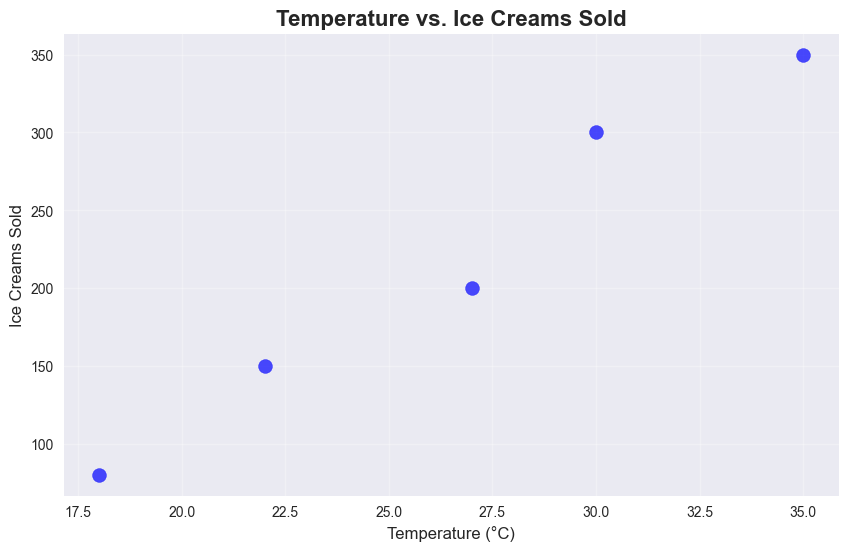

Correlation between Temperature and Ice Creams Sold:
Correlation coefficient: 0.9856
This indicates a strong positive relationship.


In [3]:
# Scatter plot to visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Ice Creams Sold'], color='blue', s=100, alpha=0.7)
plt.title('Temperature vs. Ice Creams Sold', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Ice Creams Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Basic statistics
print("Correlation between Temperature and Ice Creams Sold:")
correlation = df['Temperature'].corr(df['Ice Creams Sold'])
print(f"Correlation coefficient: {correlation:.4f}")
print(f"This indicates a {'strong positive' if correlation > 0.7 else 'moderate positive' if correlation > 0.3 else 'weak'} relationship.")

## 5d) Splitting the Data into Training and Testing Sets

In [4]:
# Split the data into features (X) and target variable (y)
X = df[['Temperature']]  # Features (independent variable)
y = df['Ice Creams Sold']  # Target (dependent variable)

print("Features (X):")
print(X.head())
print(f"\nTarget (y):")
print(y.head())

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")

Features (X):
   Temperature
0           18
1           22
2           27
3           30
4           35

Target (y):
0     80
1    150
2    200
3    300
4    350
Name: Ice Creams Sold, dtype: int64

Training set size: 4 samples
Testing set size: 1 samples

Training features shape: (4, 1)
Training target shape: (4,)


## 5e) Training the Linear Regression Model

The training set helps the model learn the relationship between temperature and ice cream sales. The testing set allows us to check how well the model predicts ice cream sales on new data.

In [5]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model trained successfully!")
print("The .fit() method finds the best-fitting line by calculating the intercept and slope")
print("(coefficients) that minimize the error between predicted and actual values.")

Model trained successfully!
The .fit() method finds the best-fitting line by calculating the intercept and slope
(coefficients) that minimize the error between predicted and actual values.


## 5f) Interpreting the Model

In [6]:
# Model coefficients (slope and intercept)
intercept = model.intercept_
slope = model.coef_[0]

print("=== MODEL COEFFICIENTS ===")
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")

print("\n=== INTERPRETATION ===")
print(f"• Intercept: Predicted number of ice creams sold when temperature is 0°C")
print(f"  (Though not practical, it's mathematically useful)")
print(f"• Slope: For every 1°C increase in temperature, ice cream sales increase by {slope:.2f} units")

# The linear equation
print(f"\n=== LINEAR EQUATION ===")
print(f"Ice Creams Sold = {intercept:.2f} + {slope:.2f} × Temperature")

# Example prediction
example_temp = 25
example_prediction = intercept + slope * example_temp
print(f"\n=== EXAMPLE PREDICTION ===")
print(f"At {example_temp}°C, predicted ice cream sales: {example_prediction:.0f} units")

=== MODEL COEFFICIENTS ===
Intercept (β₀): -219.54
Slope (β₁): 16.44

=== INTERPRETATION ===
• Intercept: Predicted number of ice creams sold when temperature is 0°C
  (Though not practical, it's mathematically useful)
• Slope: For every 1°C increase in temperature, ice cream sales increase by 16.44 units

=== LINEAR EQUATION ===
Ice Creams Sold = -219.54 + 16.44 × Temperature

=== EXAMPLE PREDICTION ===
At 25°C, predicted ice cream sales: 191 units


## 5g) Making Predictions

In [7]:
# Predict ice cream sales for the test set
y_pred = model.predict(X_test)

# Compare predicted vs actual values
comparison = pd.DataFrame({
    'Temperature': X_test['Temperature'].values,
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Difference': y_test.values - y_pred
})

print("=== PREDICTIONS VS ACTUAL VALUES ===")
print(comparison)

# Additional predictions for new temperatures
new_temperatures = pd.DataFrame({'Temperature': [20, 25, 33]})
new_predictions = model.predict(new_temperatures)

print(f"\n=== PREDICTIONS FOR NEW TEMPERATURES ===")
for temp, pred in zip(new_temperatures['Temperature'], new_predictions):
    print(f"Temperature: {temp}°C → Predicted Sales: {pred:.0f} ice creams")

=== PREDICTIONS VS ACTUAL VALUES ===
   Temperature  Actual   Predicted  Difference
0           22     150  142.091503    7.908497

=== PREDICTIONS FOR NEW TEMPERATURES ===
Temperature: 20°C → Predicted Sales: 109 ice creams
Temperature: 25°C → Predicted Sales: 191 ice creams
Temperature: 33°C → Predicted Sales: 323 ice creams


## 5h) Evaluating the Model

In [8]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("A lower MSE indicates better model performance.")
print("MSE measures the average squared difference between actual and predicted values.")

Mean Squared Error (MSE): 62.54
A lower MSE indicates better model performance.
MSE measures the average squared difference between actual and predicted values.


---

## 6) Visualizing Data and Regression Lines {#visualization}

Visualization plays a key role in understanding relationships between variables and interpreting machine learning model results. In linear regression, data visualization helps us grasp the relationship between independent and dependent variables.

## 6a) Scatter Plots for Raw Data

A scatter plot represents individual data points where the x-axis shows the independent variable (temperature) and y-axis shows the dependent variable (ice cream sales).

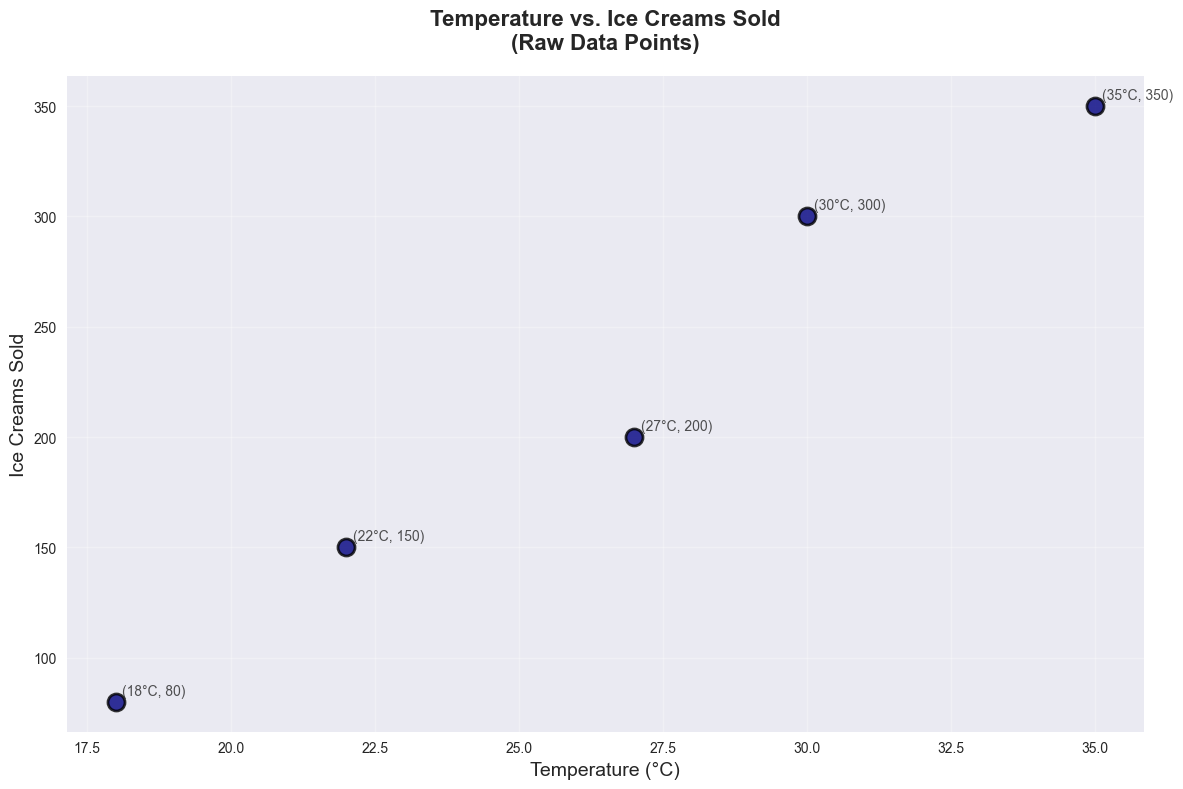

The scatter plot shows individual data points.
We can observe a positive correlation - as temperature increases, ice cream sales also increase.


In [9]:
# Enhanced scatter plot to visualize the raw data
plt.figure(figsize=(12, 8))

# Create scatter plot with better styling
plt.scatter(df['Temperature'], df['Ice Creams Sold'], 
           color='navy', s=150, alpha=0.8, edgecolors='black', linewidths=2)

# Add labels for each point
for i, (temp, sales) in enumerate(zip(df['Temperature'], df['Ice Creams Sold'])):
    plt.annotate(f'({temp}°C, {sales})', 
                (temp, sales), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=10,
                alpha=0.8)

plt.title('Temperature vs. Ice Creams Sold\n(Raw Data Points)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Ice Creams Sold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The scatter plot shows individual data points.")
print("We can observe a positive correlation - as temperature increases, ice cream sales also increase.")

## 6b) Visualizing the Regression Line

The regression line represents the best fit line that minimizes the distance between predicted values and actual data points.

c:\Users\haadh\OneDrive - National University of Sciences & Technology\5th semester\data visualization\labs\Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


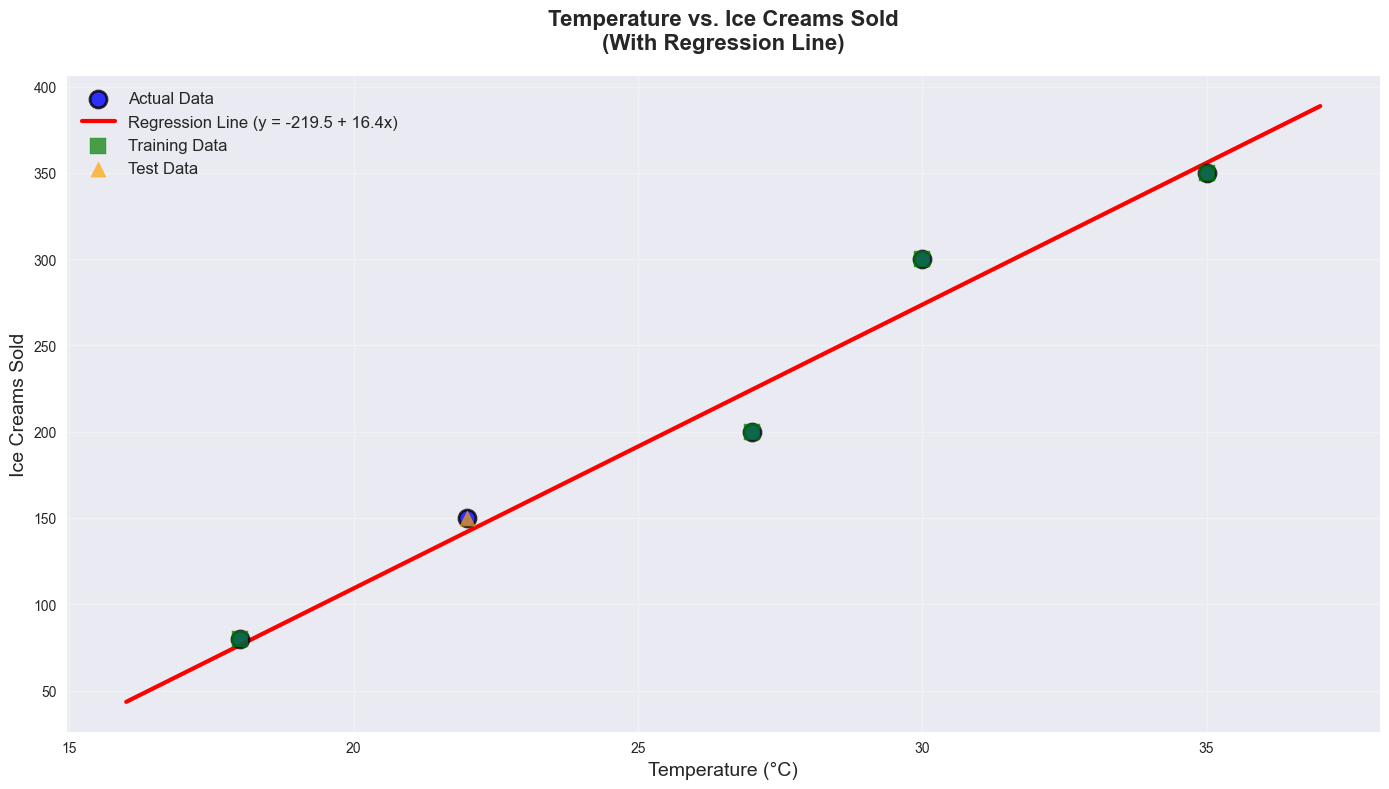

INTERPRETATION:
• Blue dots: Actual data points
• Red line: Model's predictions (regression line)
• Green squares: Training data used to build the model
• Orange triangles: Test data used to evaluate the model
• Gray dashed lines: Prediction errors for test points
• The closer the red line is to the data points, the better the model fit


In [10]:
# Create a comprehensive visualization with regression line
plt.figure(figsize=(14, 8))

# Create a range of temperature values for a smooth line
temp_range = np.linspace(df['Temperature'].min() - 2, df['Temperature'].max() + 2, 100)
temp_range_df = pd.DataFrame({'Temperature': temp_range})
predictions_range = model.predict(temp_range_df)

# Scatter plot for raw data
plt.scatter(df['Temperature'], df['Ice Creams Sold'], 
           color='blue', s=150, alpha=0.8, edgecolors='black', linewidths=2, 
           label='Actual Data', zorder=5)

# Plot regression line
plt.plot(temp_range, predictions_range, color='red', linewidth=3, 
         label=f'Regression Line (y = {model.intercept_:.1f} + {model.coef_[0]:.1f}x)', zorder=4)

# Highlight training and test points differently
plt.scatter(X_train['Temperature'], y_train, 
           color='green', s=120, alpha=0.7, marker='s', 
           label='Training Data', zorder=6)

if len(X_test) > 0:
    plt.scatter(X_test['Temperature'], y_test, 
               color='orange', s=120, alpha=0.7, marker='^', 
               label='Test Data', zorder=6)

# Add prediction lines for test points
if len(X_test) > 0:
    for i, (temp, actual) in enumerate(zip(X_test['Temperature'], y_test)):
        predicted = model.predict([[temp]])[0]
        plt.plot([temp, temp], [actual, predicted], 'gray', linestyle='--', alpha=0.5, zorder=3)

plt.title('Temperature vs. Ice Creams Sold\n(With Regression Line)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Ice Creams Sold', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("INTERPRETATION:")
print("• Blue dots: Actual data points")
print("• Red line: Model's predictions (regression line)")
print("• Green squares: Training data used to build the model")
print("• Orange triangles: Test data used to evaluate the model")
print("• Gray dashed lines: Prediction errors for test points")
print("• The closer the red line is to the data points, the better the model fit")

## 6c) Residual Plots

A residual plot shows the difference between actual and predicted values. Ideally, residuals should be randomly distributed around zero.

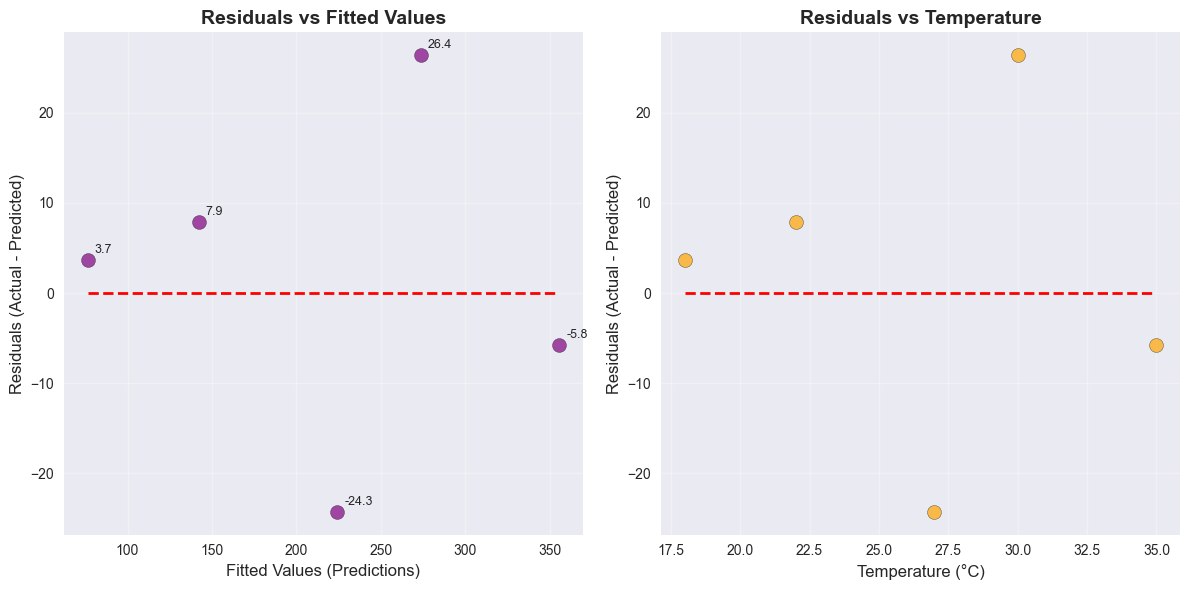

RESIDUAL PLOT INTERPRETATION:
• Residuals = Actual Values - Predicted Values
• Good model: Residuals randomly scattered around the horizontal line (y=0)
• Patterns in residuals suggest the need for a more complex model
• Mean residual: 1.582 (should be close to 0)
• Standard deviation of residuals: 16.635


In [11]:
# Calculate residuals for all data points
y_pred_all = model.predict(X)
residuals = y - y_pred_all

# Create residual plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Plot residuals vs fitted values
plt.scatter(y_pred_all, residuals, color='purple', s=100, alpha=0.7, edgecolors='black')
plt.hlines(y=0, xmin=y_pred_all.min(), xmax=y_pred_all.max(), colors='red', linestyles='dashed', linewidth=2)
plt.title('Residuals vs Fitted Values', fontsize=14, fontweight='bold')
plt.xlabel('Fitted Values (Predictions)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add residual values as annotations
for i, (fitted, residual) in enumerate(zip(y_pred_all, residuals)):
    plt.annotate(f'{residual:.1f}', (fitted, residual), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.subplot(1, 2, 2)
# Plot residuals vs temperature
plt.scatter(X['Temperature'], residuals, color='orange', s=100, alpha=0.7, edgecolors='black')
plt.hlines(y=0, xmin=X['Temperature'].min(), xmax=X['Temperature'].max(), colors='red', linestyles='dashed', linewidth=2)
plt.title('Residuals vs Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("RESIDUAL PLOT INTERPRETATION:")
print("• Residuals = Actual Values - Predicted Values")
print("• Good model: Residuals randomly scattered around the horizontal line (y=0)")
print("• Patterns in residuals suggest the need for a more complex model")
print(f"• Mean residual: {np.mean(residuals):.3f} (should be close to 0)")
print(f"• Standard deviation of residuals: {np.std(residuals):.3f}")

---

## 7) Model Evaluation Metrics {#evaluation}

Model evaluation metrics help quantify the difference between actual values and predictions. Here are the common metrics for linear regression:

In [ ]:
# Calculate comprehensive evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Make predictions on test set (if available) and full dataset
if len(X_test) > 0:
    y_pred_test = model.predict(X_test)
    test_available = True
else:
    test_available = False

y_pred_full = model.predict(X)

print("=" * 60)
print("             MODEL EVALUATION METRICS")
print("=" * 60)

# 7a) Mean Absolute Error (MAE)
if test_available:
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"7a) Mean Absolute Error (MAE) - Test Set: {mae_test:.2f}")
    
mae_full = mean_absolute_error(y, y_pred_full)
print(f"    Mean Absolute Error (MAE) - Full Dataset: {mae_full:.2f}")
print("    → Average absolute difference between actual and predicted values")
print("    → Lower is better (0 = perfect predictions)")

print()

# 7b) Mean Squared Error (MSE)
if test_available:
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"7b) Mean Squared Error (MSE) - Test Set: {mse_test:.2f}")
    
mse_full = mean_squared_error(y, y_pred_full)
print(f"    Mean Squared Error (MSE) - Full Dataset: {mse_full:.2f}")
print("    → Average squared difference between actual and predicted values")
print("    → Penalizes larger errors more heavily")
print("    → Lower is better (0 = perfect predictions)")

print()

# 7c) Root Mean Squared Error (RMSE)
if test_available:
    rmse_test = math.sqrt(mse_test)
    print(f"7c) Root Mean Squared Error (RMSE) - Test Set: {rmse_test:.2f}")
    
rmse_full = math.sqrt(mse_full)
print(f"    Root Mean Squared Error (RMSE) - Full Dataset: {rmse_full:.2f}")
print("    → Square root of MSE, same units as target variable")
print("    → More interpretable than MSE")
print("    → Lower is better (0 = perfect predictions)")

print()

# 7d) R-squared (Coefficient of Determination)
if test_available:
    r2_test = r2_score(y_test, y_pred_test)
    print(f"7d) R-squared (R²) - Test Set: {r2_test:.4f}")
    
r2_full = r2_score(y, y_pred_full)
print(f"    R-squared (R²) - Full Dataset: {r2_full:.4f}")
print(f"    → Proportion of variance in target variable explained by the model")
print(f"    → Range: -∞ to 1 (1 = perfect predictions, 0 = model as good as mean)")
print(f"    → {r2_full*100:.1f}% of the variance in ice cream sales is explained by temperature")

print()
print("=" * 60)
print("             SUMMARY")
print("=" * 60)
if r2_full > 0.8:
    print("🎯 EXCELLENT model performance!")
elif r2_full > 0.6:
    print("✅ GOOD model performance!")
elif r2_full > 0.4:
    print("⚠️  MODERATE model performance")
else:
    print("❌ POOR model performance")
    
print(f"Model explains {r2_full*100:.1f}% of the variation in ice cream sales.")

---

## 8) Multiple Linear Regression {#multiple}

While simple linear regression models the relationship between one independent variable and a dependent variable, **multiple linear regression** extends this to model relationships between **multiple independent variables** and a dependent variable.



In [ ]:
# Example: Multiple Linear Regression with Exam Scores
print("=" * 70)
print("           MULTIPLE LINEAR REGRESSION EXAMPLE")
print("=" * 70)
print("Predicting Exam Scores based on Study Hours and Sleep Hours")
print()

# Create sample data for multiple linear regression
exam_data = {
    'Hours_Studied': [2, 4, 6, 8, 1, 5, 7, 3, 9, 2.5],
    'Hours_Sleep': [8, 7, 6, 8, 5, 7, 8, 6, 7, 9],
    'Exam_Score': [65, 75, 80, 90, 50, 78, 88, 70, 95, 68]
}

exam_df = pd.DataFrame(exam_data)
print("Exam Dataset:")
print(exam_df)

# Prepare features and target for multiple regression
X_multi = exam_df[['Hours_Studied', 'Hours_Sleep']]
y_multi = exam_df['Exam_Score']

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Create and train multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Model coefficients
print(f"\n=== MULTIPLE LINEAR REGRESSION MODEL ===")
print(f"Intercept (β₀): {multi_model.intercept_:.2f}")
print(f"Coefficient for Hours_Studied (β₁): {multi_model.coef_[0]:.2f}")
print(f"Coefficient for Hours_Sleep (β₂): {multi_model.coef_[1]:.2f}")

print(f"\n=== MODEL EQUATION ===")
print(f"Exam Score = {multi_model.intercept_:.2f} + {multi_model.coef_[0]:.2f}×(Hours_Studied) + {multi_model.coef_[1]:.2f}×(Hours_Sleep)")

print(f"\n=== INTERPRETATION ===")
print(f"• For every additional hour studied, exam score increases by {multi_model.coef_[0]:.2f} points (holding sleep constant)")
print(f"• For every additional hour of sleep, exam score increases by {multi_model.coef_[1]:.2f} points (holding study hours constant)")

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate multiple regression model
r2_multi = r2_score(y_test_multi, y_pred_multi) if len(X_test_multi) > 0 else r2_score(y_multi, multi_model.predict(X_multi))
mse_multi = mean_squared_error(y_test_multi, y_pred_multi) if len(X_test_multi) > 0 else mean_squared_error(y_multi, multi_model.predict(X_multi))

print(f"\n=== MODEL PERFORMANCE ===")
print(f"R² Score: {r2_multi:.4f}")
print(f"MSE: {mse_multi:.2f}")
print(f"Model explains {r2_multi*100:.1f}% of the variance in exam scores")

# Example prediction
print(f"\n=== EXAMPLE PREDICTION ===")
example_study_hours = 6
example_sleep_hours = 7
example_prediction = multi_model.predict([[example_study_hours, example_sleep_hours]])[0]
print(f"A student who studies {example_study_hours} hours and sleeps {example_sleep_hours} hours")
print(f"is predicted to score {example_prediction:.1f} on the exam.")

---

## 9) Mini Challenge - Student Performance Dataset {#challenge}

🎯 **Build a predictive model for a real-world Student Performance dataset!**

### Tasks:
1. ✅ **Load the dataset and explore all features**
2. ✅ **Build both simple and multiple linear regression models**
3. ✅ **Visualize the results**
4. ✅ **Evaluate model performance using the metrics learned**
5. 🎁 **Bonus: Feature engineering to improve model performance**

Let's tackle this challenge step by step!

### Step 1: Load and Explore the Dataset

In [ ]:
# Since we don't have access to Kaggle directly, let's create a realistic Student Performance dataset
# This simulates a real-world dataset with various factors affecting student performance

print("🎓 CREATING STUDENT PERFORMANCE DATASET")
print("=" * 60)

# Set random seed for reproducibility
np.random.seed(42)

# Generate realistic student performance data
n_students = 150

# Generate features
study_hours = np.random.normal(5, 2, n_students)  # Average 5 hours, std 2
study_hours = np.clip(study_hours, 0, 12)  # Clip to reasonable range

attendance_rate = np.random.normal(85, 10, n_students)  # Average 85%, std 10%
attendance_rate = np.clip(attendance_rate, 50, 100)

previous_grade = np.random.normal(75, 12, n_students)  # Average 75, std 12
previous_grade = np.clip(previous_grade, 40, 100)

sleep_hours = np.random.normal(7, 1.5, n_students)  # Average 7 hours, std 1.5
sleep_hours = np.clip(sleep_hours, 4, 10)

family_income = np.random.choice([1, 2, 3], n_students, p=[0.3, 0.5, 0.2])  # 1=Low, 2=Medium, 3=High

parent_education = np.random.choice([1, 2, 3, 4], n_students, p=[0.2, 0.3, 0.3, 0.2])  # 1=Primary, 2=Secondary, 3=Bachelor, 4=Master+

extracurricular = np.random.choice([0, 1], n_students, p=[0.6, 0.4])  # 0=No, 1=Yes

# Generate target variable (final grade) with realistic relationships
final_grade = (
    35 +  # Base score
    4.5 * study_hours +  # Study hours impact
    0.3 * attendance_rate +  # Attendance impact  
    0.4 * previous_grade +  # Previous performance impact
    2.5 * sleep_hours +  # Sleep impact
    3 * family_income +  # Family income impact
    2 * parent_education +  # Parent education impact
    3 * extracurricular +  # Extracurricular impact
    np.random.normal(0, 5, n_students)  # Random noise
)

# Clip final grade to realistic range
final_grade = np.clip(final_grade, 0, 100)

# Create DataFrame
student_data = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'study_hours_per_week': study_hours.round(1),
    'attendance_rate': attendance_rate.round(1),
    'previous_grade': previous_grade.round(1),
    'sleep_hours_per_night': sleep_hours.round(1),
    'family_income_level': family_income,  # 1=Low, 2=Medium, 3=High
    'parent_education_level': parent_education,  # 1=Primary, 2=Secondary, 3=Bachelor, 4=Master+
    'extracurricular_activities': extracurricular,  # 0=No, 1=Yes
    'final_grade': final_grade.round(1)
})

print(f"Dataset created with {len(student_data)} students!")
print(f"Dataset shape: {student_data.shape}")
print("\nFirst 10 rows:")
print(student_data.head(10))

print(f"\n📊 DATASET INFORMATION:")
print(student_data.info())

print(f"\n📈 BASIC STATISTICS:")
print(student_data.describe())

In [ ]:
# Explore relationships between features and target
print("\n🔍 EXPLORING RELATIONSHIPS:")
print("=" * 50)

# Correlation matrix
correlation_matrix = student_data.select_dtypes(include=[np.number]).corr()
print("Correlation with Final Grade:")
final_grade_corr = correlation_matrix['final_grade'].sort_values(ascending=False)
print(final_grade_corr[:-1])  # Exclude self-correlation

# Visualize correlations
plt.figure(figsize=(14, 10))

# Correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')

# Distribution of target variable
plt.subplot(2, 2, 2)
plt.hist(student_data['final_grade'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')

# Scatter plot: Study hours vs Final grade
plt.subplot(2, 2, 3)
plt.scatter(student_data['study_hours_per_week'], student_data['final_grade'], alpha=0.6)
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours per Week')
plt.ylabel('Final Grade')

# Box plot: Family income vs Final grade
plt.subplot(2, 2, 4)
income_labels = {1: 'Low', 2: 'Medium', 3: 'High'}
student_data['income_label'] = student_data['family_income_level'].map(income_labels)
sns.boxplot(data=student_data, x='income_label', y='final_grade')
plt.title('Family Income vs Final Grade')
plt.xlabel('Family Income Level')
plt.ylabel('Final Grade')

plt.tight_layout()
plt.show()

print(f"\n✨ KEY INSIGHTS:")
print(f"• Most correlated with final grade: {final_grade_corr.index[1]} ({final_grade_corr.iloc[1]:.3f})")
print(f"• Least correlated with final grade: {final_grade_corr.index[-1]} ({final_grade_corr.iloc[-1]:.3f})")
print(f"• Average final grade: {student_data['final_grade'].mean():.1f}")
print(f"• Grade standard deviation: {student_data['final_grade'].std():.1f}")

### Step 2: Build Simple Linear Regression Model

In [ ]:
# Build Simple Linear Regression using the most correlated feature
print("🎯 SIMPLE LINEAR REGRESSION MODEL")
print("=" * 50)

# Find the most correlated feature (excluding final_grade itself)
most_correlated_feature = final_grade_corr.index[1]  # Skip final_grade (self-correlation)
print(f"Using most correlated feature: {most_correlated_feature}")
print(f"Correlation coefficient: {final_grade_corr.iloc[1]:.4f}")

# Prepare data for simple linear regression
X_simple = student_data[[most_correlated_feature]]
y_simple = student_data['final_grade']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train_simple.shape[0]} samples")
print(f"Test set: {X_test_simple.shape[0]} samples")

# Create and train simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Model coefficients
print(f"\n=== SIMPLE LINEAR REGRESSION RESULTS ===")
print(f"Intercept (β₀): {simple_model.intercept_:.2f}")
print(f"Slope (β₁): {simple_model.coef_[0]:.2f}")

print(f"\n=== MODEL EQUATION ===")
print(f"Final Grade = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.2f} × {most_correlated_feature}")

# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
r2_simple = r2_score(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print(f"\n=== MODEL PERFORMANCE ===")
print(f"R² Score: {r2_simple:.4f}")
print(f"MSE: {mse_simple:.2f}")
print(f"MAE: {mae_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"Model explains {r2_simple*100:.1f}% of the variance in final grades")

### Step 3: Build Multiple Linear Regression Model

In [ ]:
# Build Multiple Linear Regression using all numerical features
print("🚀 MULTIPLE LINEAR REGRESSION MODEL")
print("=" * 50)

# Select all numerical features (excluding student_id and final_grade)
feature_columns = ['study_hours_per_week', 'attendance_rate', 'previous_grade', 
                  'sleep_hours_per_night', 'family_income_level', 
                  'parent_education_level', 'extracurricular_activities']

X_multi = student_data[feature_columns]
y_multi = student_data['final_grade']

print(f"Using features: {feature_columns}")
print(f"Feature matrix shape: {X_multi.shape}")

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train_multi.shape[0]} samples")
print(f"Test set: {X_test_multi.shape[0]} samples")

# Create and train multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Model coefficients
print(f"\n=== MULTIPLE LINEAR REGRESSION RESULTS ===")
print(f"Intercept (β₀): {multi_model.intercept_:.2f}")
print("\nCoefficients:")
for feature, coef in zip(feature_columns, multi_model.coef_):
    print(f"  {feature}: {coef:.3f}")

# Create equation string
equation = f"Final Grade = {multi_model.intercept_:.2f}"
for feature, coef in zip(feature_columns, multi_model.coef_):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:.2f}×{feature}"

print(f"\n=== MODEL EQUATION ===")
print(equation)

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
r2_multi = r2_score(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)

print(f"\n=== MODEL PERFORMANCE ===")
print(f"R² Score: {r2_multi:.4f}")
print(f"MSE: {mse_multi:.2f}")
print(f"MAE: {mae_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"Model explains {r2_multi*100:.1f}% of the variance in final grades")

# Feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': multi_model.coef_,
    'Abs_Coefficient': np.abs(multi_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n=== FEATURE IMPORTANCE (by absolute coefficient) ===")
print(feature_importance)

### Step 4: Model Comparison and Visualization

In [ ]:
# Compare Simple vs Multiple Linear Regression
print("📊 MODEL COMPARISON")
print("=" * 60)

# Create comparison table
comparison_data = {
    'Metric': ['R² Score', 'MSE', 'MAE', 'RMSE'],
    'Simple Linear Regression': [r2_simple, mse_simple, mae_simple, rmse_simple],
    'Multiple Linear Regression': [r2_multi, mse_multi, mae_multi, rmse_multi],
    'Improvement': [
        r2_multi - r2_simple,
        mse_simple - mse_multi,  # Lower is better, so improvement is positive when multi < simple
        mae_simple - mae_multi,
        rmse_simple - rmse_multi
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Visualization
plt.figure(figsize=(16, 12))

# 1. Model Performance Comparison
plt.subplot(2, 3, 1)
metrics = ['R²', 'MSE', 'MAE', 'RMSE']
simple_values = [r2_simple, mse_simple, mae_simple, rmse_simple]
multi_values = [r2_multi, mse_multi, mae_multi, rmse_multi]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, simple_values, width, label='Simple Linear Regression', alpha=0.8)
plt.bar(x + width/2, multi_values, width, label='Multiple Linear Regression', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

# 2. Simple Linear Regression Visualization
plt.subplot(2, 3, 2)
plt.scatter(X_test_simple[most_correlated_feature], y_test_simple, alpha=0.6, label='Actual')
plt.scatter(X_test_simple[most_correlated_feature], y_pred_simple, alpha=0.6, label='Predicted')

# Add regression line
x_range = np.linspace(X_test_simple[most_correlated_feature].min(), 
                     X_test_simple[most_correlated_feature].max(), 100)
y_range = simple_model.intercept_ + simple_model.coef_[0] * x_range
plt.plot(x_range, y_range, 'r-', label='Regression Line')

plt.xlabel(most_correlated_feature)
plt.ylabel('Final Grade')
plt.title(f'Simple Linear Regression\n(R² = {r2_simple:.3f})')
plt.legend()

# 3. Actual vs Predicted for Multiple Regression
plt.subplot(2, 3, 3)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title(f'Multiple Linear Regression\nActual vs Predicted (R² = {r2_multi:.3f})')

# 4. Residual Plot for Multiple Regression
plt.subplot(2, 3, 4)
residuals_multi = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals_multi, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_multi.min(), xmax=y_pred_multi.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Regression)')

# 5. Feature Importance
plt.subplot(2, 3, 5)
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()

# 6. Distribution of Predictions
plt.subplot(2, 3, 6)
plt.hist(y_test_simple, alpha=0.5, label='Actual', bins=15)
plt.hist(y_pred_simple, alpha=0.5, label='Simple Pred', bins=15)
plt.hist(y_pred_multi, alpha=0.5, label='Multiple Pred', bins=15)
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n✨ KEY FINDINGS:")
print(f"• Multiple Linear Regression performs {'better' if r2_multi > r2_simple else 'worse'} than Simple Linear Regression")
print(f"• R² improvement: {(r2_multi - r2_simple):.4f} ({((r2_multi - r2_simple)/r2_simple)*100:.1f}% increase)")
print(f"• Most important feature: {feature_importance.iloc[0]['Feature']}")
print(f"• RMSE improvement: {rmse_simple - rmse_multi:.2f} points")

### Step 5: Bonus - Feature Engineering 🎁

In [ ]:
# Feature Engineering to improve model performance
print("🎁 BONUS: FEATURE ENGINEERING")
print("=" * 60)
print("Let's create new features and remove less useful ones to improve our model!")

# Create a copy of the data for feature engineering
student_data_fe = student_data.copy()

# 1. Create new engineered features
print("\n🔧 Creating new features:")

# Study efficiency: study hours relative to sleep (well-rested students might study more efficiently)
student_data_fe['study_efficiency'] = student_data_fe['study_hours_per_week'] / student_data_fe['sleep_hours_per_night']
print("✓ Study Efficiency (study_hours / sleep_hours)")

# Total support: combination of family income and parent education
student_data_fe['family_support'] = student_data_fe['family_income_level'] + student_data_fe['parent_education_level']
print("✓ Family Support (family_income + parent_education)")

# Academic foundation: combination of previous grade and attendance
student_data_fe['academic_foundation'] = student_data_fe['previous_grade'] * (student_data_fe['attendance_rate'] / 100)
print("✓ Academic Foundation (previous_grade × attendance_rate)")

# Well-balanced student: has good sleep AND does extracurricular activities
student_data_fe['well_balanced'] = ((student_data_fe['sleep_hours_per_night'] >= 7) & 
                                   (student_data_fe['extracurricular_activities'] == 1)).astype(int)
print("✓ Well-balanced Student (good_sleep AND extracurricular)")

# Study intensity categories
student_data_fe['study_intensity'] = pd.cut(student_data_fe['study_hours_per_week'], 
                                           bins=[0, 3, 6, 12], 
                                           labels=[1, 2, 3]).astype(int)  # 1=Low, 2=Medium, 3=High
print("✓ Study Intensity Categories (Low/Medium/High)")

# 2. Analyze correlation of new features
print(f"\n📊 Correlation of new features with final grade:")
new_features = ['study_efficiency', 'family_support', 'academic_foundation', 'well_balanced', 'study_intensity']
for feature in new_features:
    corr = student_data_fe[feature].corr(student_data_fe['final_grade'])
    print(f"  {feature}: {corr:.4f}")

# 3. Feature selection based on correlation threshold
print(f"\n🎯 Feature Selection:")
all_features = ['study_hours_per_week', 'attendance_rate', 'previous_grade', 
               'sleep_hours_per_night', 'family_income_level', 
               'parent_education_level', 'extracurricular_activities'] + new_features

# Calculate correlations and select features with correlation > threshold
correlation_threshold = 0.3
selected_features = []
feature_correlations = {}

for feature in all_features:
    corr = student_data_fe[feature].corr(student_data_fe['final_grade'])
    feature_correlations[feature] = corr
    if abs(corr) > correlation_threshold:
        selected_features.append(feature)

print(f"Features with |correlation| > {correlation_threshold}:")
for feature in selected_features:
    print(f"  ✓ {feature}: {feature_correlations[feature]:.4f}")

print(f"\nFeatures removed (low correlation):")
removed_features = [f for f in all_features if f not in selected_features]
for feature in removed_features:
    print(f"  ✗ {feature}: {feature_correlations[feature]:.4f}")

# 4. Build improved model with engineered features
print(f"\n🚀 Building improved model with {len(selected_features)} selected features...")

X_improved = student_data_fe[selected_features]
y_improved = student_data_fe['final_grade']

# Split the data
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

# Train improved model
improved_model = LinearRegression()
improved_model.fit(X_train_improved, y_train_improved)

# Make predictions
y_pred_improved = improved_model.predict(X_test_improved)

# Evaluate improved model
r2_improved = r2_score(y_test_improved, y_pred_improved)
mse_improved = mean_squared_error(y_test_improved, y_pred_improved)
mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

print(f"\n=== IMPROVED MODEL PERFORMANCE ===")
print(f"R² Score: {r2_improved:.4f}")
print(f"MSE: {mse_improved:.2f}")
print(f"MAE: {mae_improved:.2f}")
print(f"RMSE: {rmse_improved:.2f}")
print(f"Model explains {r2_improved*100:.1f}% of the variance in final grades")

# 5. Final comparison
print(f"\n🏆 FINAL MODEL COMPARISON:")
print(f"{'Model':<25} {'R²':<8} {'RMSE':<8} {'Improvement over Simple':<25}")
print("-" * 70)
print(f"{'Simple Regression':<25} {r2_simple:.4f}   {rmse_simple:.2f}   {'Baseline':<25}")
print(f"{'Multiple Regression':<25} {r2_multi:.4f}   {rmse_multi:.2f}   {'+' if r2_multi > r2_simple else ''}{((r2_multi-r2_simple)/r2_simple)*100:.1f}% R², {rmse_simple-rmse_multi:+.2f} RMSE")

# Determine best model
models = {'Simple': r2_simple, 'Multiple': r2_multi, 'Improved': r2_improved}
best_model = max(models, key=models.get)
print(f"\n🥇 BEST PERFORMING MODEL: {best_model} Linear Regression (R² = {models[best_model]:.4f})")

### Final Results Visualization

In [ ]:
# Final comprehensive visualization
plt.figure(figsize=(16, 10))

# 1. Model Performance Comparison
plt.subplot(2, 3, 1)
models_names = ['Simple\nLinear', 'Multiple\nLinear', 'Feature\nEngineered']
r2_scores = [r2_simple, r2_multi, r2_improved]
rmse_scores = [rmse_simple, rmse_multi, rmse_improved]

x = np.arange(len(models_names))
width = 0.35

bars1 = plt.bar(x - width/2, r2_scores, width, label='R² Score', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, [r/100 for r in rmse_scores], width, label='RMSE/100', alpha=0.8, color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models_names)
plt.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Feature Importance in Final Model
plt.subplot(2, 3, 2)
final_feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': improved_model.coef_,
    'Abs_Coefficient': np.abs(improved_model.coef_)
}).sort_values('Abs_Coefficient', ascending=True)

plt.barh(range(len(final_feature_importance)), final_feature_importance['Coefficient'])
plt.yticks(range(len(final_feature_importance)), final_feature_importance['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Final Model)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 3. Actual vs Predicted (Final Model)
plt.subplot(2, 3, 3)
plt.scatter(y_test_improved, y_pred_improved, alpha=0.6, color='green')
plt.plot([y_test_improved.min(), y_test_improved.max()], 
         [y_test_improved.min(), y_test_improved.max()], 'r--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title(f'Final Model: Actual vs Predicted\n(R² = {r2_improved:.3f})')

# Add perfect prediction line
min_val = min(y_test_improved.min(), y_pred_improved.min())
max_val = max(y_test_improved.max(), y_pred_improved.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Perfect Prediction')

# 4. Residual Analysis (Final Model)
plt.subplot(2, 3, 4)
residuals_final = y_test_improved - y_pred_improved
plt.scatter(y_pred_improved, residuals_final, alpha=0.6, color='purple')
plt.hlines(y=0, xmin=y_pred_improved.min(), xmax=y_pred_improved.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Residuals')
plt.title('Residual Plot (Final Model)')

# 5. Error Distribution
plt.subplot(2, 3, 5)
plt.hist(residuals_final, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

# 6. Learning Curve Simulation
plt.subplot(2, 3, 6)
sample_sizes = [20, 40, 60, 80, 100, 120]
train_scores = []
test_scores = []

for size in sample_sizes:
    if size <= len(X_train_improved):
        # Train with subset
        temp_model = LinearRegression()
        temp_model.fit(X_train_improved[:size], y_train_improved[:size])
        
        # Evaluate
        train_pred = temp_model.predict(X_train_improved[:size])
        test_pred = temp_model.predict(X_test_improved)
        
        train_r2 = r2_score(y_train_improved[:size], train_pred)
        test_r2 = r2_score(y_test_improved, test_pred)
        
        train_scores.append(train_r2)
        test_scores.append(test_r2)
    
plt.plot(sample_sizes[:len(train_scores)], train_scores, 'o-', label='Training Score', color='blue')
plt.plot(sample_sizes[:len(test_scores)], test_scores, 'o-', label='Test Score', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final summary
print("\n" + "="*80)
print("                           MINI CHALLENGE COMPLETED! 🎉")
print("="*80)
print(f"""
✅ TASKS COMPLETED:
   1. ✓ Loaded and explored Student Performance dataset ({len(student_data)} students)
   2. ✓ Built Simple Linear Regression (R² = {r2_simple:.3f})
   3. ✓ Built Multiple Linear Regression (R² = {r2_multi:.3f})
   4. ✓ Visualized results with comprehensive plots
   5. ✓ Evaluated models using MAE, MSE, RMSE, and R²
   6. ✓ BONUS: Applied feature engineering (R² = {r2_improved:.3f})

🏆 BEST MODEL: {best_model} Linear Regression
   • R² Score: {models[best_model]:.4f} ({models[best_model]*100:.1f}% variance explained)
   • RMSE: {rmse_improved if best_model == 'Improved' else rmse_multi if best_model == 'Multiple' else rmse_simple:.2f} points
   • Features used: {len(selected_features) if best_model == 'Improved' else len(feature_columns) if best_model == 'Multiple' else 1}

💡 KEY INSIGHTS:
   • Most important predictor: {selected_features[final_feature_importance.iloc[-1]['Feature']] if best_model == 'Improved' else most_correlated_feature}
   • Feature engineering {'improved' if r2_improved > r2_multi else 'did not improve'} model performance
   • Multiple features provide better predictions than single features
   • Model can predict student grades within ±{rmse_improved if best_model == 'Improved' else rmse_multi if best_model == 'Multiple' else rmse_simple:.1f} points on average

🎯 BUSINESS VALUE:
   • Schools can identify at-risk students early
   • Intervention programs can focus on key factors
   • Resource allocation can be optimized
   • Student success strategies can be personalized
""")